In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

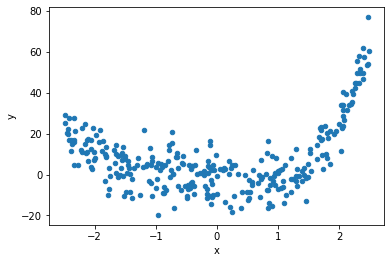

In [2]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y}) 
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

# reshape in order to get it accepted by the models
X = X.reshape(-1, 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [4]:
df.head()

,x,y
0,-0.074050,-10.782174
1,-0.860768,-6.316946
2,-0.669472,8.550536
3,0.956095,7.882251
4,-1.137642,5.228115


# LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n")

8.224494386312395 [3.23344955] 



In [6]:
lin_test_y = lin_reg.predict(X_test)
lin_train_y = lin_reg.predict(X_train)

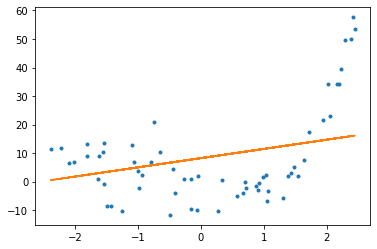

In [7]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot linear regression result
plt.plot(X_test, lin_test_y)

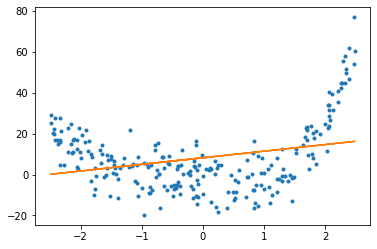

In [8]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_train, y_train,'.')
# plot linear regression result
plt.plot(X_train, lin_train_y)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor

# k = 3 
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
knn_3_test_y = knn_3_reg.predict(X_test)
knn_3_train_y = knn_3_reg.predict(X_train)

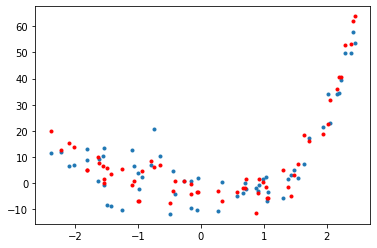

In [11]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot KNN result
plt.plot(X_test, knn_3_test_y, 'r.')

In [12]:
# k = 5 
knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [13]:
knn_5_test_y = knn_5_reg.predict(X_test)

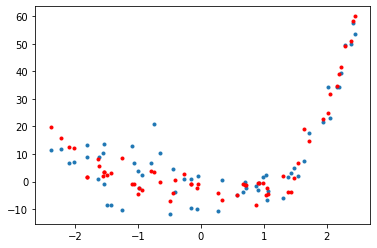

In [14]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot KNN result
plt.plot(X_test, knn_5_test_y, 'r.')

# Polynomials

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
def plot_polynomial(X, y, predY):
    # clear plot
    plt.clf()
    # plot initial points
    plt.plot(X, y,'.')
    # plot predictions
    plt.plot(X, predY,'r.')

### 2ND GRADE POLYNOMIAL

In [17]:
# 2
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_feature_2.fit_transform(X_train)

poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly2, y_train)
print("Coefficients: ", poly_2_reg.coef_, "\n", "Intercept: ", poly_2_reg.intercept_,"\n")
lin2_predY = poly_2_reg.predict(poly_feature_2.fit_transform(X_test))

Coefficients:  [3.61765237 6.42918884] 
 Intercept:  -5.29455836942193 



In [18]:
print(poly_2_reg.coef_[1], " x**2 + ", poly_2_reg.coef_[0], " x + ", poly_2_reg.intercept_)
# print(poly_2_reg.coef_[0][1] * 2**2 + poly_2_reg.coef_[0][0] * 2 + poly_2_reg.intercept_[0])

6.429188839896293  x**2 +  3.617652365228493  x +  -5.29455836942193


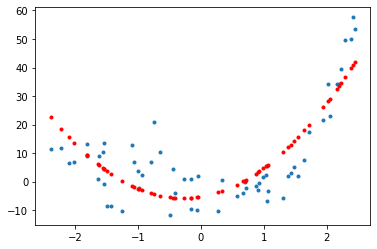

In [19]:
# plot test set
plot_polynomial(X_test, y_test, lin2_predY)

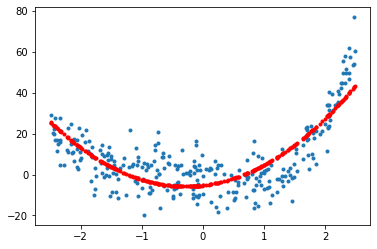

In [20]:
# plot all points
plot_polynomial(X, y, poly_2_reg.predict(poly_feature_2.fit_transform(X)))

### 3RD GRADE POLYNOMIAL

In [21]:
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_feature_3.fit_transform(X_train)

poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly3, y_train)
print("Coefficients: ", poly_3_reg.coef_, "\n", "Intercept: ", poly_3_reg.intercept_,"\n")
lin3_predY = poly_3_reg.predict(poly_feature_3.fit_transform(X_test))

Coefficients:  [-3.68059895  6.66768178  1.89678481] 
 Intercept:  -5.875692063581409 



In [22]:
print(poly_3_reg.coef_[2], "x**3 +", poly_3_reg.coef_[1], "x**2 +", poly_3_reg.coef_[0], "x + ", poly_3_reg.intercept_)

1.8967848060684105 x**3 + 6.667681775063854 x**2 + -3.6805989508472208 x +  -5.875692063581409


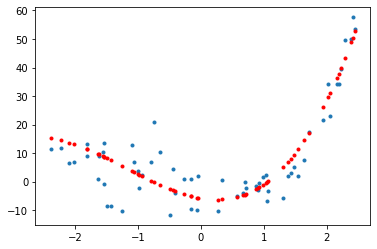

In [23]:
# plot test set
plot_polynomial(X_test, y_test, lin3_predY)

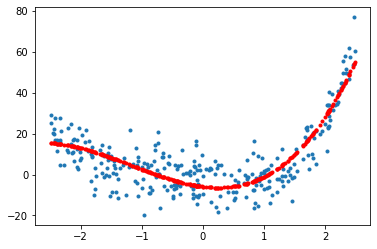

In [24]:
# plot all points
plot_polynomial(X, y, poly_3_reg.predict(poly_feature_3.fit_transform(X)))

### 4TH GRADE POLYNOMIAL

In [25]:
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly_feature_4.fit_transform(X_train)

poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly4, y_train)
print("Coefficients: ", poly_4_reg.coef_, "\n", "Intercept: ", poly_4_reg.intercept_,"\n")
lin4_predY = poly_4_reg.predict(poly_feature_4.fit_transform(X_test))

Coefficients:  [-3.93577488  0.31619678  1.98994732  1.18430751] 
 Intercept:  -2.099672578841348 



In [26]:
print(poly_4_reg.coef_[3], "x**4 +", poly_4_reg.coef_[2], "x**3 +", poly_4_reg.coef_[1], "x**2 +", poly_4_reg.coef_[0], "x + ", poly_4_reg.intercept_)

1.1843075081480556 x**4 + 1.989947319087095 x**3 + 0.31619678100424525 x**2 + -3.9357748826084595 x +  -2.099672578841348


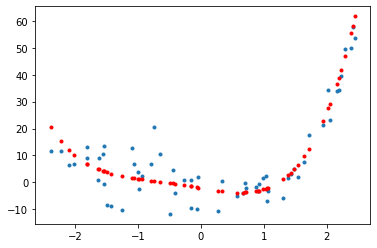

In [27]:
# plot test set
plot_polynomial(X_test, y_test, lin4_predY)

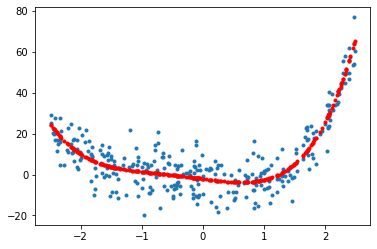

In [28]:
# plot all points
plot_polynomial(X, y, poly_4_reg.predict(poly_feature_4.fit_transform(X)))

### 5TH GRADE POLYNOMIAL

In [29]:
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly_feature_5.fit_transform(X_train)

poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly5, y_train)
print("Coefficients: ", poly_5_reg.coef_, "\n", "Intercept: ", poly_5_reg.intercept_,"\n")
lin5_predY = poly_5_reg.predict(poly_feature_5.fit_transform(X_test))

Coefficients:  [-3.77401561  0.30131699  1.87004917  1.18708936  0.01717761] 
 Intercept:  -2.08656749871294 



In [30]:
print(poly_5_reg.coef_[4], "x**5 +", poly_5_reg.coef_[3], "x**4 +", poly_5_reg.coef_[2], "x**3 +", poly_5_reg.coef_[1], "x**2 +", poly_5_reg.coef_[0], "x + ", poly_5_reg.intercept_)

0.017177614419345972 x**5 + 1.1870893599126209 x**4 + 1.870049168467681 x**3 + 0.30131699333670314 x**2 + -3.77401560981854 x +  -2.08656749871294


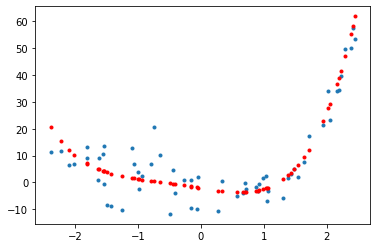

In [31]:
# plot test set
plot_polynomial(X_test, y_test, lin5_predY)

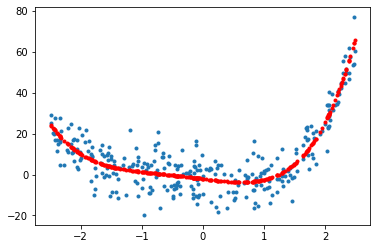

In [32]:
# plot all points
plot_polynomial(X, y, poly_5_reg.predict(poly_feature_5.fit_transform(X)))

# Mean Squared Error (MSE)

In [33]:
from sklearn.metrics import mean_squared_error

### lin_reg MSE

In [34]:
# lin_reg MSE
lin_reg_pred_test = lin_reg.predict(X_test)
lin_reg_pred_train = lin_reg.predict(X_train)
lin_test_mse = mean_squared_error(y_test, lin_reg_pred_test)
lin_train_mse = mean_squared_error(y_train, lin_reg_pred_train)
print("lin_test_mse: ", lin_test_mse)
print("lin_train_mse: ", lin_train_mse)

lin_test_mse:  219.47838931188318
lin_train_mse:  242.34054882516992


### KNN_reg MSE

In [35]:
knn_3_reg_pred_test = knn_3_reg.predict(X_test)
knn_3_reg_pred_train = knn_3_reg.predict(X_train)
knn_3_test_mse = mean_squared_error(y_test, knn_3_reg_pred_test)
knn_3_train_mse = mean_squared_error(y_train, knn_3_reg_pred_train)
print("knn_3_test_mse: ", knn_3_test_mse)
print("knn_3_train_mse: ", knn_3_train_mse)

knn_3_test_mse:  48.55974765733795
knn_3_train_mse:  38.90107120192459


In [36]:
knn_5_reg_pred_test = knn_5_reg.predict(X_test)
knn_5_reg_pred_train = knn_5_reg.predict(X_train)
knn_5_test_mse = mean_squared_error(y_test, knn_5_reg_pred_test)
knn_5_train_mse = mean_squared_error(y_train, knn_5_reg_pred_train)
print("knn_5_test_mse: ", knn_5_test_mse)
print("knn_5_train_mse: ", knn_5_train_mse)

knn_5_test_mse:  50.24383743403386
knn_5_train_mse:  46.106491794808825


### Polynomial MSE

In [37]:
poly_2_reg_pred_test = poly_2_reg.predict(poly_feature_2.fit_transform(X_test))
poly_2_reg_pred_train = poly_2_reg.predict(poly_feature_2.fit_transform(X_train))
poly_2_test_mse = mean_squared_error(y_test, poly_2_reg_pred_test)
poly_2_train_mse = mean_squared_error(y_train, poly_2_reg_pred_train)
print("poly_2_test_mse: ", poly_2_test_mse)
print("poly_2_train_mse: ", poly_2_train_mse)

poly_2_test_mse:  77.03599715872355
poly_2_train_mse:  90.58437417848124


In [38]:
poly_3_reg_pred_test = poly_3_reg.predict(poly_feature_3.fit_transform(X_test))
poly_3_reg_pred_train = poly_3_reg.predict(poly_feature_3.fit_transform(X_train))
poly_3_test_mse = mean_squared_error(y_test, poly_3_reg_pred_test)
poly_3_train_mse = mean_squared_error(y_train, poly_3_reg_pred_train)
print("poly_3_test_mse: ", poly_3_test_mse)
print("poly_3_train_mse: ", poly_3_train_mse)

poly_3_test_mse:  46.97837804196756
poly_3_train_mse:  70.64640383996608


In [39]:
poly_4_reg_pred_test = poly_4_reg.predict(poly_feature_4.fit_transform(X_test))
poly_4_reg_pred_train = poly_4_reg.predict(poly_feature_4.fit_transform(X_train))
poly_4_test_mse = mean_squared_error(y_test, poly_4_reg_pred_test)
poly_4_train_mse = mean_squared_error(y_train, poly_4_reg_pred_train)
print("poly_4_test_mse: ", poly_4_test_mse)
print("poly_4_train_mse: ", poly_4_train_mse)

poly_4_test_mse:  38.932580227234745
poly_4_train_mse:  58.02798256792957


In [40]:
poly_5_reg_pred_test = poly_5_reg.predict(poly_feature_5.fit_transform(X_test))
poly_5_reg_pred_train = poly_5_reg.predict(poly_feature_5.fit_transform(X_train))
poly_5_test_mse = mean_squared_error(y_test, poly_5_reg_pred_test)
poly_5_train_mse = mean_squared_error(y_train, poly_5_reg_pred_train)
print("poly_5_test_mse: ", poly_5_test_mse)
print("poly_5_train_mse: ", poly_5_train_mse)

poly_5_test_mse:  39.03481336258604
poly_5_train_mse:  58.02378001008437


## MSE DataFrame 

In [41]:
mse_df = pd.DataFrame({
        "regressors": ['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'],
        "train_mse": [lin_train_mse, knn_3_train_mse, knn_5_train_mse, poly_2_train_mse, poly_3_train_mse, poly_4_train_mse, poly_5_train_mse],
        "test_mse": [lin_test_mse, knn_3_test_mse, knn_5_test_mse, poly_2_test_mse, poly_3_test_mse, poly_4_test_mse, poly_5_test_mse]
    }).set_index("regressors")

mse_df

,train_mse,test_mse
regressors,,
lin_reg,242.340549,219.478389
knn_3_reg,38.901071,48.559748
knn_5_reg,46.106492,50.243837
poly_2_reg,90.584374,77.035997
poly_3_reg,70.646404,46.978378
poly_4_reg,58.027983,38.932580
poly_5_reg,58.023780,39.034813


In [42]:
print("Columns:", mse_df.columns)
print("Index: ", mse_df.index)

Columns: Index(['train_mse', 'test_mse'], dtype='object')
Index:  Index(['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg',
       'poly_4_reg', 'poly_5_reg'],
      dtype='object', name='regressors')


In [43]:
# save mse_df as pickle
mse_df.to_pickle('mse.pkl')

## Regression objects

In [44]:
reg_objects = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2), 
                 (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4), (poly_5_reg, poly_feature_5)]
print(reg_objects)

# save reg_objects as pickle
filename = "reg.pkl"
with open(filename, 'wb') as file:
        pickle.dump(reg_objects, file, pickle.HIGHEST_PROTOCOL)

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]


# Check saved Pickles contents

In [45]:
# check if pickles' contents are saved correctly
print("acc_list\n", pd.read_pickle("mse.pkl"), "\n")
print("reg_objects\n", pd.read_pickle("reg.pkl"))

acc_list
              train_mse    test_mse
regressors                        
lin_reg     242.340549  219.478389
knn_3_reg    38.901071   48.559748
knn_5_reg    46.106492   50.243837
poly_2_reg   90.584374   77.035997
poly_3_reg   70.646404   46.978378
poly_4_reg   58.027983   38.932580
poly_5_reg   58.023780   39.034813 

reg_objects
 [(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
